In [122]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime as dt
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

start = dt.datetime(2018,4,3)
end = dt.datetime(2020,4,3)
aapl = pd.read_csv('hw4_AAPL.csv')
fb = pd.read_csv('hw4_FB.csv')
baba = pd.read_csv('hw4_BABA.csv')

N = len(aapl['Close'])
print(N)
p1 = aapl.loc[N-1]['Close']
p2 = baba.loc[N-1]['Close']
p3 = fb.loc[N-1]['Close']

#print(p1)
w = np.zeros(3)
w[0]= p1*1.5
w[1]= p2*2.5
w[2]= p3*1.8
print(w)
r1 = np.log(aapl.Close) - np.log(aapl.Close.shift(1))
r2 = np.log(baba.Close) - np.log(baba.Close.shift(1))
r3 = np.log(fb.Close) - np.log(fb.Close.shift(1))



506
[362.11500549 467.77500153 277.52398682]


In [134]:
#compute variance-covariance matrix
sigma = np.zeros((3,3))
sigma[0][0],sigma[1][1],sigma[2][2] = r1_ewm_var,r3_ewm_var,r2_ewm_var
sigma[0][1]=sigma[1][0] = r13_corr*np.sqrt(r1_ewm_var)*np.sqrt(r3_ewm_var)
sigma[0][2]=sigma[2][0] = r12_corr*np.sqrt(r1_ewm_var)*np.sqrt(r2_ewm_var)
sigma[1][2]=sigma[2][1] = r23_corr*np.sqrt(r2_ewm_var)*np.sqrt(r3_ewm_var)
sigma


array([[0.00259932, 0.00138446, 0.00220834],
       [0.00138446, 0.0009408 , 0.00127432],
       [0.00220834, 0.00127432, 0.00226502]])

In [124]:
#calculate 1-day parametric VaR
para_VaR = norm.ppf(0.9725)*np.sqrt(w.T.dot(sigma).dot(w))
print("1-day parametric VaR in millions is {}".format(para_VaR))


1-day parametric VaR in millions is 85.05825012068846


In [125]:
#Part b
#pnl = tomorrow's price - today's price
pnl = 1.5*(p1*np.exp(r1)-p1)+ 1.8*(p2*np.exp(r2)-p2)+ 2.5*(p3*np.exp(r3)-p3)
#97.25% 1 day VAR
hist_VaR = -pnl.quantile(1-.9725)
print("1-day historical VaR in millions is {}".format(hist_VaR))

1-day historical VaR in millions is 44.2911413376049


In [126]:
#Part c
#We can see that parametric VAR is higher than historical VAR. I would recommend parametric VAR because it's safer and more and more conservative. 


In [2]:
#Q3b
import numpy as np
mu,sig,alpha = 2,1,0.9725
N=10000

def sim_ES(N, mu, sig, alpha): 
    X = np.random.normal(mu, sig,N)
    VaR = np.quantile(X,1-0.9725)
    print(VaR)
    result = np.zeros(N)
    count= 0
    for i in range (N):
        if X[i]<=VaR:
            result[i] = -X[i]
            count +=1
        else: 
            result[i] =0
            
    return sum(result)/count

sim_ES(N, mu, sig, alpha)

0.061144787994785864


0.31644686038665193

In [135]:
# Compute theoretical value
theo_value =-mu+(sig*norm.pdf(norm.ppf(alpha)))/(1-alpha)
theo_value

0.30156138426362844

[0.281054235830405, 0.4139469194775623, 0.27188901592102016, 0.25165597383371047, 0.2635993803471123, 0.3010385849521516, 0.2965215751245609, 0.2990606192800709, 0.2970082502780808, 0.2994574294090627]


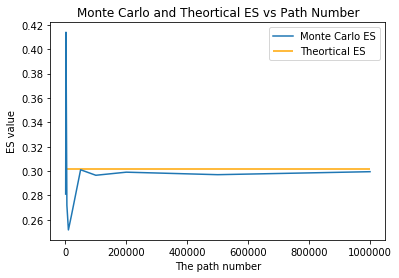

In [136]:
#Part c: Plot graph
path = [1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000]
ES_MC = [sim_ES(N, mu, sig, alpha) for N in path]

print(ES_MC)
plt.plot(path,ES_MC,label='Monte Carlo ES')
plt.hlines(theo_value,xmin= path[0], xmax = path[9], colors='orange', linestyles='solid', label='Theortical ES')
plt.xlabel("The path number")
plt.ylabel("ES value")
plt.title("Monte Carlo and Theortical ES vs Path Number")
plt.legend()

In [137]:
ES_para = norm.pdf(norm.ppf(0.9725))*np.sqrt(w.T.dot(sigma).dot(w))/(1-0.9725)
print(ES_para)

102.0215797226299


In [142]:
results = np.zeros(len(pnl))
count = 0
for i in range (len(pnl)):
    if pnl[i]>=hist_VaR:
        results[i] = pnl[i]
        count +=1
    else: 
        results[i] =0
        
ES_hist = sum(results)/count
print(ES_hist)


64.77354777908782


In [143]:
#Comment: 
diff = ES_para - ES_hist
print(diff)

#We can see that the historical ES is smaller than the parametric ES. Historical VAR doesn't require any assumptions, so the kurtosis
#of the distribution can vary, while parametric VAR requires the pnl distribution to be normal. In this case, the tails of the
#historical ES distribution are smaller than that of the para VAR. The parametric ES again provides a more conservative solution to 
#the problem, which can be a good thing in risk management. In general, parametric ES is better for linear instrument.  

37.248031943542074
